# 911 Calls Capstone Project

### Import Libraries

In [200]:
import numpy as np
import pandas as pd

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Create DataFrame

In [202]:
df = pd.read_csv('911.csv')

In [203]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Check Some Data

In [204]:
df['zip'].value_counts().head(5)                           # Top 5 Zip Code

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [205]:
df['twp'].value_counts().head(5)                        # Top 5 Townships(twp)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [206]:
df['title'].nunique()                                 # Number of unique title codes in 'title' column

148

In [207]:
# OR
len(df['title'].unique())

148

# Analyze 'title' Column

### Create 'Reason' column from 'title' column

In [208]:
df['Reason'] = df['title'].apply(lambda t: t.split(':')[0])

In [209]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


### Most Common Reasons For a 911 call

In [210]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

### Count Plot for Reasons

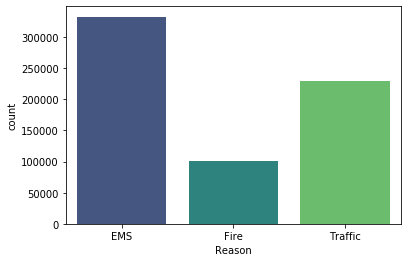

In [211]:
sns.countplot(x='Reason', data=df, palette='viridis')

# Analyze 'timeStamp' Column

In [212]:
type(df['timeStamp'].iloc[0])                                       #  Type

str

### Convert 'timeStamp' Column From String to DateTime.

In [213]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [214]:
type(df['timeStamp'].iloc[0])                                   # Type

pandas._libs.tslibs.timestamps.Timestamp

In [215]:
t = df['timeStamp'].iloc[0]

In [216]:
t.date()

datetime.date(2015, 12, 10)

In [217]:
t.time()

datetime.time(17, 10, 52)

In [218]:
t.hour

17

In [219]:
t.year

2015

### Create 'Hour', 'Month', 'Week', 'Year' and 'Day of Week' Columns

In [220]:
df['Hour'] = df['timeStamp'].apply(lambda t: t.hour)
df['Month'] = df['timeStamp'].apply(lambda t: t.month)
df['Week'] = df['timeStamp'].apply(lambda t: t.week)
df['Year'] = df['timeStamp'].apply(lambda t: t.year)
df['Day of Week'] = df['timeStamp'].apply(lambda t: t.dayofweek)

In [221]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Week,Year,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,50,2015,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,50,2015,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,50,2015,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,50,2015,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,50,2015,3


### Convert 'Day of Week' into String names

In [222]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [223]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [224]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Week,Year,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,50,2015,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,50,2015,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,50,2015,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,50,2015,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,50,2015,Thu


### Count Plot for 'Day of Week' Column

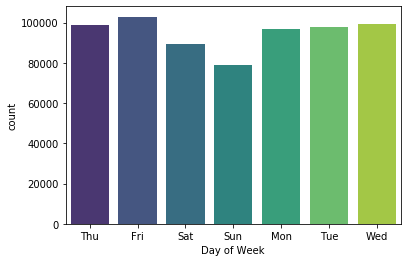

In [225]:
sns.countplot(x='Day of Week', data=df, palette='viridis')

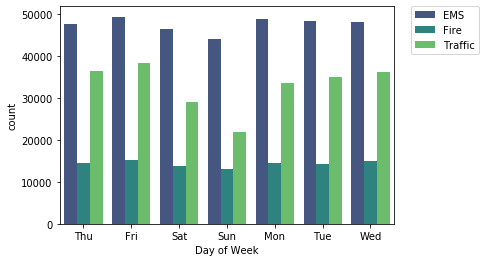

In [226]:
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')       # Countplot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)                 # Relocate the legend

### Count Plot For Month

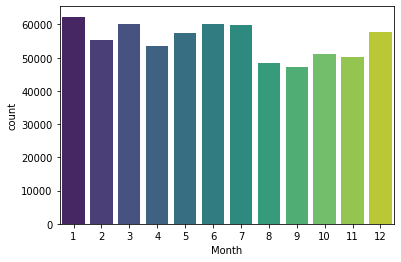

In [227]:
sns.countplot(x='Month', data=df, palette='viridis')                               # Countplot 

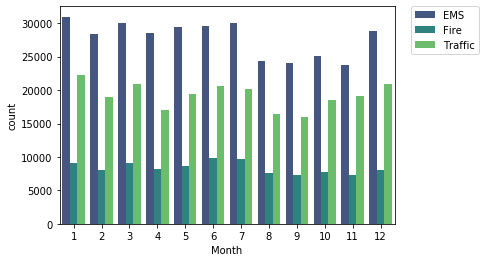

In [228]:
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')             # Countplot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)                 # Relocate the legend

### Count Plot For Year

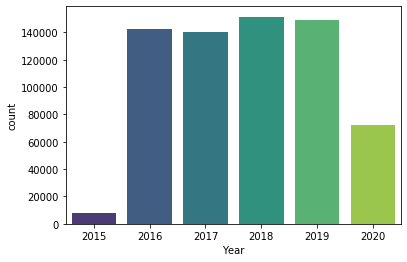

In [229]:
sns.countplot(x='Year', data=df, palette='viridis')                               # Countplot 

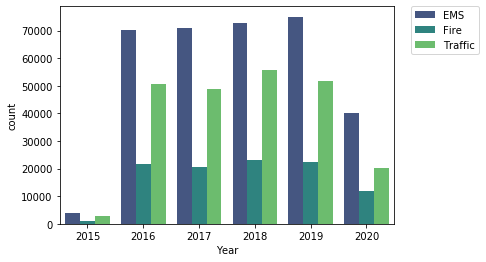

In [230]:
sns.countplot(x='Year', data=df, hue='Reason', palette='viridis')             # Countplot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)                 # Relocate the legend

### Create a gropuby Object for 'Month' Column with count()

In [231]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Week,Year,Day of Week
Month,,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509,57509


### Create Plots for byMonth

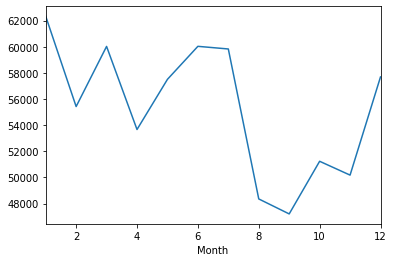

In [232]:
byMonth['lat'].plot()                                      # line plot

#### Seaborn lmplot() to create the number of calls per month

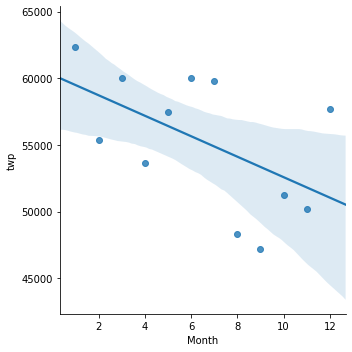

In [233]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

### Create 'Date' and 'Time' Columns From 'timeStamp' Column

In [234]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date())            # Date
df['Time'] = df['timeStamp'].apply(lambda t: t.time())            # Time

In [235]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Week,Year,Day of Week,Date,Time
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,50,2015,Thu,2015-12-10,17:10:52
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,50,2015,Thu,2015-12-10,17:29:21
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,50,2015,Thu,2015-12-10,14:39:21
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,50,2015,Thu,2015-12-10,16:47:36
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,50,2015,Thu,2015-12-10,16:56:52


### Create a gropuby Object for 'Date' Column with count()

In [236]:
byDate = df.groupby('Date').count()
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Week,Year,Day of Week,Time
Date,,,,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444,444,444,444


### Create Plot for byDate

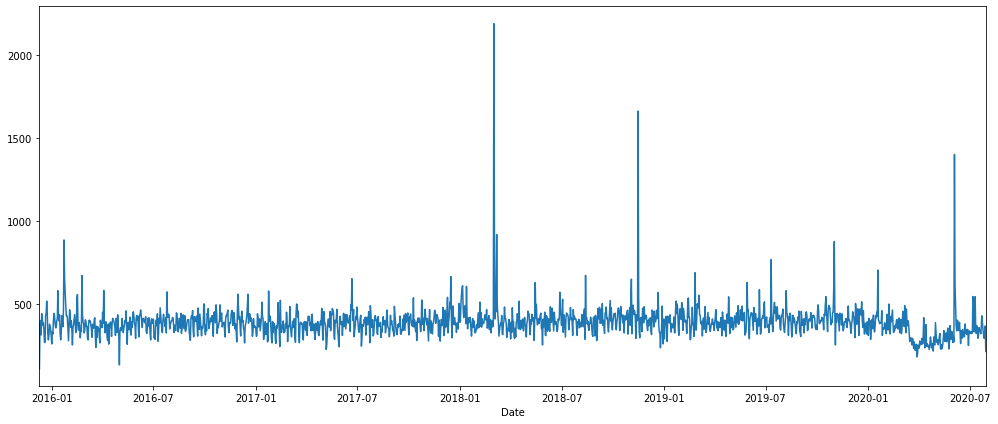

In [237]:
plt.figure(figsize=(14,6))
byDate['lat'].plot()                         # Plot
plt.tight_layout()

# Plots for 'Reason' Column

#### Traffic

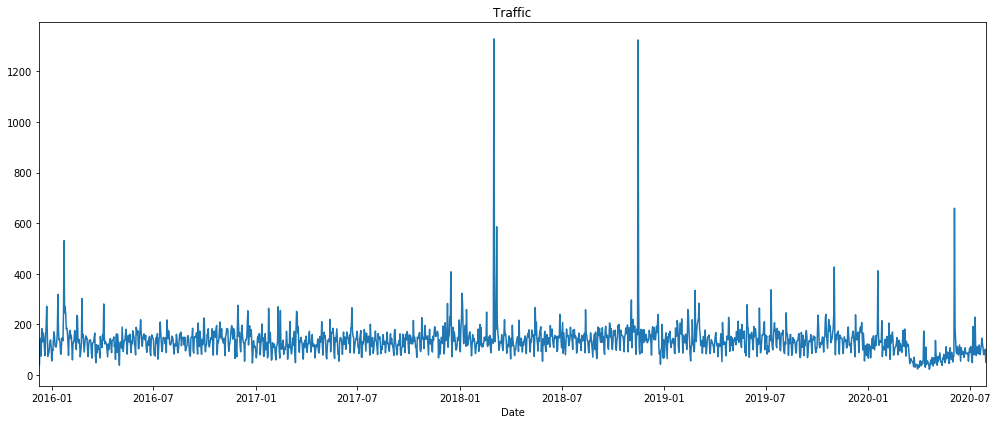

In [238]:
plt.figure(figsize=(14,6))
traffic = df[df['Reason']=='Traffic'].groupby('Date').count()['lat']
traffic.plot()
plt.title("Traffic")
plt.tight_layout()

#### Fire

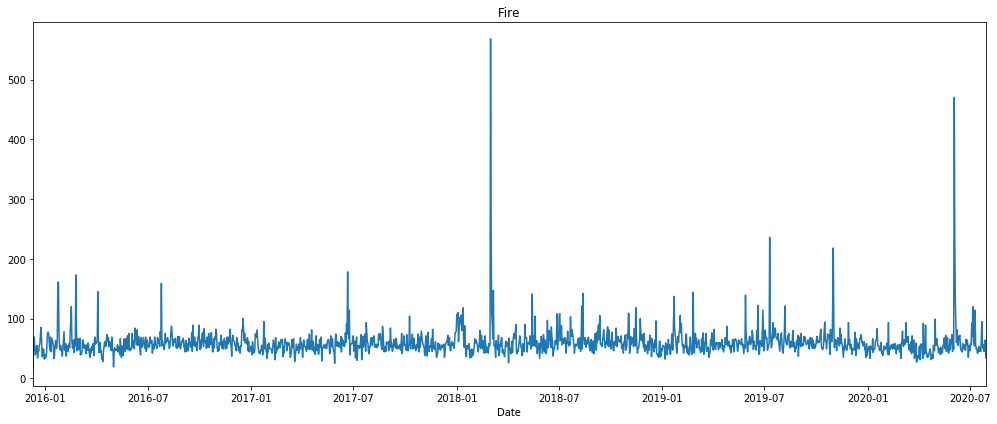

In [239]:
plt.figure(figsize=(14,6))
fire = df[df['Reason']=='Fire'].groupby('Date').count()['lat']
fire.plot()
plt.title("Fire")
plt.tight_layout()

#### EMS

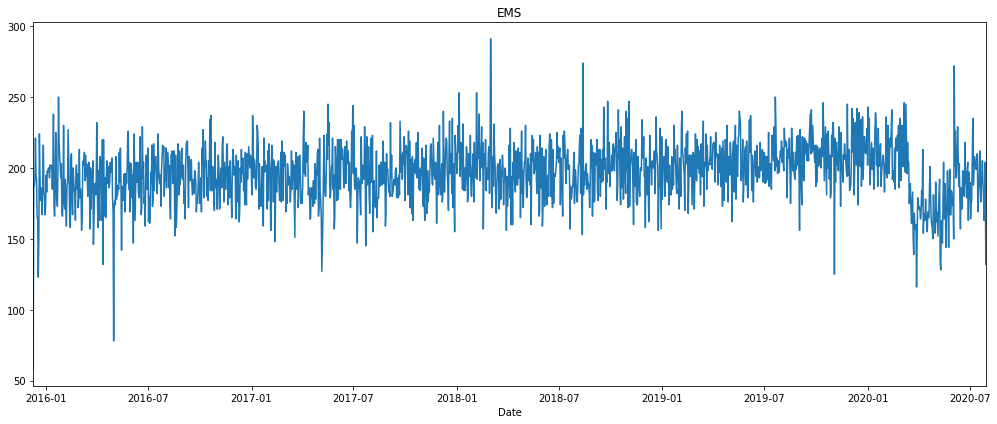

In [240]:
plt.figure(figsize=(14,6))
ems = df[df['Reason']=='EMS'].groupby('Date').count()['lat']
ems.plot()
plt.title("EMS")
plt.tight_layout()

# Heatmaps and Cluster for Calls in 'Day of Week'

## By Hour

In [241]:
dayHour = df.pivot_table(index="Day of Week", columns="Hour", values="Reason" ,aggfunc="count")
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


#### Heatmaps

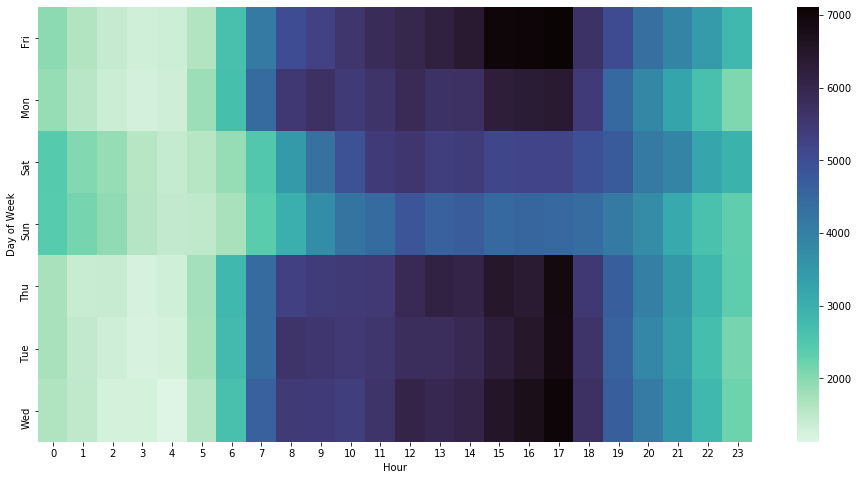

In [242]:
plt.figure(figsize=(16,8))
sns.heatmap(dayHour, cmap='mako_r')

#### Clustermap

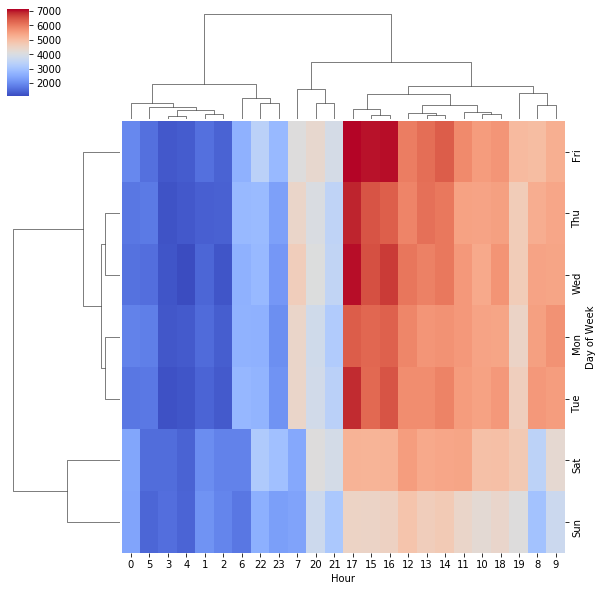

In [243]:
sns.clustermap(dayHour, cmap='coolwarm')

## By Month

In [244]:
dayMonth = df.pivot_table(index="Day of Week", columns="Month", values="Reason" ,aggfunc="count")
dayMonth

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
Tue,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
Wed,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682


#### Heatmap

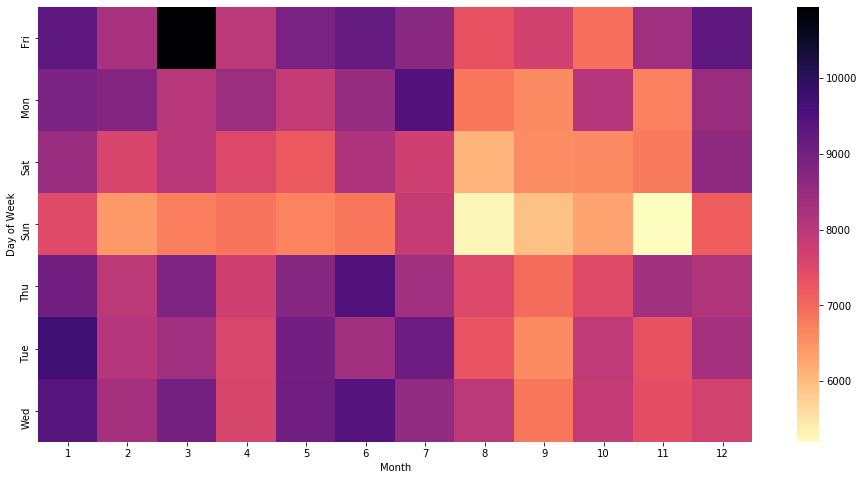

In [245]:
plt.figure(figsize=(16,8))
sns.heatmap(dayMonth, cmap='magma_r')

#### Clustermap

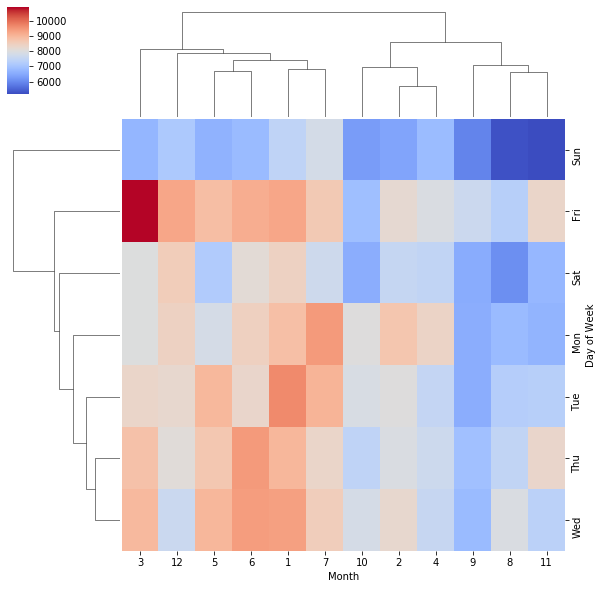

In [246]:
sns.clustermap(dayMonth, cmap='coolwarm')